
#### Vaex- Reading And Processing Huge Datasets in seconds
#### What is Vaex?

Vaex is a high performance Python library for lazy Out-of-Core DataFrames (similar to Pandas), to visualize and explore big tabular datasets. It calculates statistics such as mean, sum, count, standard deviation etc, on an N-dimensional grid for more than a billion (10^9) samples/rows per second. Visualization is done using histograms, density plots and 3d volume rendering, allowing interactive exploration of big data. Vaex uses memory mapping, zero memory copy policy and lazy computations for best performance (no memory wasted).


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import vaex

## Making dataset

In [0]:
n_row = 500000
n_col = 800

data = pd.DataFrame(np.random.randint(0,100, size=(n_row, n_col)), columns=['col%d'% i for i in range(n_col)])

In [3]:
data.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,...,col760,col761,col762,col763,col764,col765,col766,col767,col768,col769,col770,col771,col772,col773,col774,col775,col776,col777,col778,col779,col780,col781,col782,col783,col784,col785,col786,col787,col788,col789,col790,col791,col792,col793,col794,col795,col796,col797,col798,col799
0,77,16,43,59,27,36,24,13,31,37,12,68,81,10,56,30,76,84,92,54,51,3,79,26,6,39,41,69,72,27,25,48,84,59,77,1,74,23,11,98,...,40,79,27,76,42,12,16,72,29,73,43,34,17,55,84,64,38,28,38,59,13,74,59,25,9,65,92,76,9,92,5,42,88,84,74,87,68,29,72,18
1,72,0,67,19,41,13,84,44,0,44,95,59,81,66,28,75,42,55,75,40,63,54,29,10,6,33,80,95,44,78,95,40,89,89,65,2,45,27,74,10,...,91,44,85,57,41,72,29,83,95,31,6,97,81,15,74,47,47,38,82,70,5,46,64,41,83,9,64,52,64,7,76,65,77,86,64,47,61,62,78,2
2,44,97,43,65,91,0,72,72,23,62,3,59,77,40,36,12,62,4,56,94,84,19,13,23,90,76,50,11,12,28,45,19,93,26,16,21,11,86,49,83,...,25,93,57,58,72,8,24,29,39,72,43,70,69,63,80,21,1,64,42,3,1,66,5,26,94,16,77,90,98,20,85,16,4,19,83,4,35,98,3,80
3,31,72,37,49,40,15,13,79,36,77,19,5,90,22,77,9,76,33,49,6,4,0,97,58,92,88,31,13,32,71,43,41,63,9,74,19,70,29,83,6,...,39,54,78,83,65,63,81,73,35,99,8,83,22,30,27,89,20,84,49,97,24,43,82,9,99,27,18,11,55,59,67,70,70,19,25,92,7,4,30,43
4,5,2,90,54,98,21,97,64,17,72,79,75,23,40,9,74,7,30,81,74,59,42,96,78,75,12,27,74,40,93,53,1,9,24,44,66,55,10,32,5,...,36,70,37,69,55,95,1,29,41,86,46,11,98,92,53,50,41,52,88,57,3,9,15,42,51,55,90,61,35,29,99,28,81,63,62,57,4,82,80,68


In [4]:
data.shape

(500000, 800)

In [5]:
#information of the dataset
data.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 800 entries, col0 to col799
dtypes: int64(800)
memory usage: 3.0 GB


## saving to csv file¶

In [0]:
data.to_csv('dataset.csv', index=False)

## Creating hdf5 file

In [0]:
vaex_data = vaex.from_csv('/content/dataset.csv', convert=True, chunk_size=5_000_000)

In [8]:
type(vaex_data)

vaex.hdf5.dataset.Hdf5MemoryMapped

## Read Hdf5 files using Vaex library

In [0]:
vaex_data = vaex.open('/content/dataset.csv.hdf5')

In [4]:
type(vaex_data)

vaex.hdf5.dataset.Hdf5MemoryMapped

## Some Operation

In [5]:
vaex_data.head()

#    col0    col1    col2    col3    col4    col5    col6    col7    col8    col9    col10    col11    col12    col13    col14    col15    col16    col17    col18    col19    col20    col21    col22    col23    col24    col25    col26    col27    col28    col29    col30    col31    col32    col33    col34    col35    col36    col37    col38    col39    col40    col41    col42    col43    col44    col45    col46    col47    col48    col49    col50    col51    col52    col53    col54    col55    col56    col57    col58    col59    col60    col61    col62    col63    col64    col65    col66    col67    col68    col69    col70    col71    col72    col73    col74    col75    col76    col77    col78    col79    col80    col81    col82    col83    col84    col85    col86    col87    col88    col89    col90    col91    col92    col93    col94    col95    col96    col97    col98    col99    col100    col101    col102    col103    col104    col105    col106    col107    col108    col109    col110    col111    col112    col113    col114    col115    col116    col117    col118    col119    col120    col121    col122    col123    col124    col125    col126    col127    col128    col129    col130    col131    col132    col133    col134    col135    col136    col137    col138    col139    col140    col141    col142    col143    col144    col145    col146    col147    col148    col149    col150    col151    col152    col153    col154    col155    col156    col157    col158    col159    col160    col161    col162    col163    col164    col165    col166    col167    col168    col169    col170    col171    col172    col173    col174    col175    col176    col177    col178    col179    col180    col181    col182    col183    col184    col185    col186    col187    col188    col189    col190    col191    col192    col193    col194    col195    col196    col197    col198    col199    col200    col201    col202    col203    col204    col205    col206    col207    col208    col209    col210    col211    col212    col213    col214    col215    col216    col217    col218    col219    col220    col221    col222    col223    col224    col225    col226    col227    col228    col229    col230    col231    col232    col233    col234    col235    col236    col237    col238    col239    col240    col241    col242    col243    col244    col245    col246    col247    col248    col249    col250    col251    col252    col253    col254    col255    col256    col257    col258    col259    col260    col261    col262    col263    col264    col265    col266    col267    col268    col269    col270    col271    col272    col273    col274    col275    col276    col277    col278    col279    col280    col281    col282    col283    col284    col285    col286    col287    col288    col289    col290    col291    col292    col293    col294    col295    col296    col297    col298    col299    col300    col301    col302    col303    col304    col305    col306    col307    col308    col309    col310    col311    col312    col313    col314    col315    col316    col317    col318    col319    col320    col321    col322    col323    col324    col325    col326    col327    col328    col329    col330    col331    col332    col333    col334    col335    col336    col337    col338    col339    col340    col341    col342    col343    col344    col345    col346    col347    col348    col349    col350    col351    col352    col353    col354    col355    col356    col357    col358    col359    col360    col361    col362    col363    col364    col365    col366    col367    col368    col369    col370    col371    col372    col373    col374    col375    col376    col377    col378    col379    col380    col381    col382    col383    col384    col385    col386    col387    col388    col389    col390    col391    col392    col393    col394    col395    col396    col397    col398    col399    col400    col401    col402    col403    col404    col405    col406    col407    col408    col409    col41

In [7]:
#multiplication of two column
%%time
vaex_multi = vaex_data['col3']*vaex_data['col5']
vaex_multi

CPU times: user 82 µs, sys: 0 ns, total: 82 µs
Wall time: 85.8 µs


Expression = (col3 * col5)
Length: 500,000 dtype: int64 (expression)
-----------------------------------------
     0  2124
     1   247
     2     0
     3   735
     4  1134
    ...     
499995  2784
499996  3420
499997  2840
499998  3174
499999  1218

In [8]:
#more than 50 valuse of col12
more_50 = vaex_data[vaex_data['col12']>50]
more_50

#,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116,col117,col118,col119,col120,col121,col122,col123,col124,col125,col126,col127,col128,col129,col130,col131,col132,col133,col134,col135,col136,col137,col138,col139,col140,col141,col142,col143,col144,col145,col146,col147,col148,col149,col150,col151,col152,col153,col154,col155,col156,col157,col158,col159,col160,col161,col162,col163,col164,col165,col166,col167,col168,col169,col170,col171,col172,col173,col174,col175,col176,col177,col178,col179,col180,col181,col182,col183,col184,col185,col186,col187,col188,col189,col190,col191,col192,col193,col194,col195,col196,col197,col198,col199,col200,col201,col202,col203,col204,col205,col206,col207,col208,col209,col210,col211,col212,col213,col214,col215,col216,col217,col218,col219,col220,col221,col222,col223,col224,col225,col226,col227,col228,col229,col230,col231,col232,col233,col234,col235,col236,col237,col238,col239,col240,col241,col242,col243,col244,col245,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255,col256,col257,col258,col259,col260,col261,col262,col263,col264,col265,col266,col267,col268,col269,col270,col271,col272,col273,col274,col275,col276,col277,col278,col279,col280,col281,col282,col283,col284,col285,col286,col287,col288,col289,col290,col291,col292,col293,col294,col295,col296,col297,col298,col299,col300,col301,col302,col303,col304,col305,col306,col307,col308,col309,col310,col311,col312,col313,col314,col315,col316,col317,col318,col319,col320,col321,col322,col323,col324,col325,col326,col327,col328,col329,col330,col331,col332,col333,col334,col335,col336,col337,col338,col339,col340,col341,col342,col343,col344,col345,col346,col347,col348,col349,col350,col351,col352,col353,col354,col355,col356,col357,col358,col359,col360,col361,col362,col363,col364,col365,col366,col367,col368,col369,col370,col371,col372,col373,col374,col375,col376,col377,col378,col379,col380,col381,col382,col383,col384,col385,col386,col387,col388,col389,col390,col391,col392,col393,col394,col395,col396,col397,col398,col399,col400,col401,col402,col403,col404,col405,col406,col407,col408,col409,col410,col411,col412,col413,col414,col415,col416,col417,col418,col419,col420,col421,col422,col423,col424,col425,col426,col427,col428,col429,col430,col431,col432,col433,col434,col435,col436,col437,col438,col439,col440,col441,col442,col443,col444,col445,col446,col447,col448,col449,col450,col451,col452,col453,col454,col455,col456,col457,col458,col459,col460,col461,col462,col463,col464,col465,col466,col467,col468,col469,col470,col471,col472,col473,col474,col475,col476,col477,col478,col479,col480,col481,col482,col483,col484,col485,col486,col487,col488,col489,col490,col491,col492,col493,col494,col495,col496,col497,col498,col499,col500,col501,col502,col503,col504,col505,col506,col507,col508,col509,col510,col511,col512,col513,col514,col515,col516,col517,col518,col519,col520,col521,col522,col523,col524,col525,col526,col527,col528,col529,col530,col531,col532,col533,col534,col535,col536,col537,col538,col539,col540,col541,col542,col543,col544,col545,col546,col547,col548,col549,col550,col551,col552,col553,col554,col555,col556,col557,col558,col559,col560,col561,col562,col563,col564,col565,col566,col567,col568,col569,col570,col571,col572,col573,col574,col575,col576,col577,col578,col579,col580,col581,col582,col583,col584,col585,col586

In [9]:
#addition of two column
%%time
add = vaex_data['col15'] + vaex_data['col25']
add

CPU times: user 79 µs, sys: 2 µs, total: 81 µs
Wall time: 85.1 µs


Expression = (col15 + col25)
Length: 500,000 dtype: int64 (expression)
-----------------------------------------
     0   69
     1  108
     2   88
     3   97
     4   86
    ...    
499995  166
499996   99
499997  154
499998   43
499999  100

In [11]:
#adding new column
vaex_data['new_col'] = add
vaex_data.head()

#    col0    col1    col2    col3    col4    col5    col6    col7    col8    col9    col10    col11    col12    col13    col14    col15    col16    col17    col18    col19    col20    col21    col22    col23    col24    col25    col26    col27    col28    col29    col30    col31    col32    col33    col34    col35    col36    col37    col38    col39    col40    col41    col42    col43    col44    col45    col46    col47    col48    col49    col50    col51    col52    col53    col54    col55    col56    col57    col58    col59    col60    col61    col62    col63    col64    col65    col66    col67    col68    col69    col70    col71    col72    col73    col74    col75    col76    col77    col78    col79    col80    col81    col82    col83    col84    col85    col86    col87    col88    col89    col90    col91    col92    col93    col94    col95    col96    col97    col98    col99    col100    col101    col102    col103    col104    col105    col106    col107    col108    col109    col110    col111    col112    col113    col114    col115    col116    col117    col118    col119    col120    col121    col122    col123    col124    col125    col126    col127    col128    col129    col130    col131    col132    col133    col134    col135    col136    col137    col138    col139    col140    col141    col142    col143    col144    col145    col146    col147    col148    col149    col150    col151    col152    col153    col154    col155    col156    col157    col158    col159    col160    col161    col162    col163    col164    col165    col166    col167    col168    col169    col170    col171    col172    col173    col174    col175    col176    col177    col178    col179    col180    col181    col182    col183    col184    col185    col186    col187    col188    col189    col190    col191    col192    col193    col194    col195    col196    col197    col198    col199    col200    col201    col202    col203    col204    col205    col206    col207    col208    col209    col210    col211    col212    col213    col214    col215    col216    col217    col218    col219    col220    col221    col222    col223    col224    col225    col226    col227    col228    col229    col230    col231    col232    col233    col234    col235    col236    col237    col238    col239    col240    col241    col242    col243    col244    col245    col246    col247    col248    col249    col250    col251    col252    col253    col254    col255    col256    col257    col258    col259    col260    col261    col262    col263    col264    col265    col266    col267    col268    col269    col270    col271    col272    col273    col274    col275    col276    col277    col278    col279    col280    col281    col282    col283    col284    col285    col286    col287    col288    col289    col290    col291    col292    col293    col294    col295    col296    col297    col298    col299    col300    col301    col302    col303    col304    col305    col306    col307    col308    col309    col310    col311    col312    col313    col314    col315    col316    col317    col318    col319    col320    col321    col322    col323    col324    col325    col326    col327    col328    col329    col330    col331    col332    col333    col334    col335    col336    col337    col338    col339    col340    col341    col342    col343    col344    col345    col346    col347    col348    col349    col350    col351    col352    col353    col354    col355    col356    col357    col358    col359    col360    col361    col362    col363    col364    col365    col366    col367    col368    col369    col370    col371    col372    col373    col374    col375    col376    col377    col378    col379    col380    col381    col382    col383    col384    col385    col386    col387    col388    col389    col390    col391    col392    col393    col394    col395    col396    col397    col398    col399    col400    col401    col402    col403    col404    col405    col406    col407    col408    col409    col41

In [12]:
#finding mean of new_col
vaex_data.mean(vaex_data.new_col)

array(99.029012)

In [17]:
# create statistics on a regular grid (1d)
vaex_data.mean(vaex_data.new_col, binby=vaex_data.col0, shape=42, limits=[-10, 10]) 


array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, 98.91263095,         nan, 98.64891914,         nan,
       99.32566973,         nan, 99.39887415,         nan, 98.94445554,
               nan, 99.22748718,         nan, 98.76249229,         nan,
       98.95007955,         nan, 99.44222539,         nan, 98.26675868,
               nan,         nan])

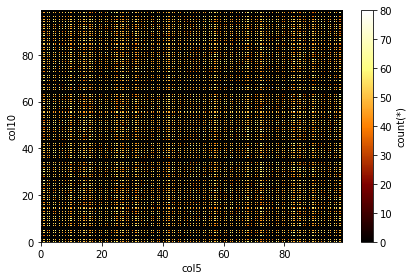

In [20]:
 # make a plot quickly
vaex_data.plot(vaex_data.col5, vaex_data.col10, show=True)

## Loading tips dataset

In [0]:
tips = sns.load_dataset('tips')

In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
#converting to csv file
tips.to_csv('tips.csv', index=False)

In [0]:
#converting to vaex file
tip_data = vaex.from_csv('/content/tips.csv', convert=True, chunk_size=5_000_000)

In [0]:
#reading hdf5 file
tip_data = vaex.open('/content/tips.csv.hdf5')

In [33]:
tip_data.head()

#,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.5,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
5,5,25.29,4.71,Male,No,Sun,Dinner,4
6,6,8.77,2,Male,No,Sun,Dinner,2
7,7,26.88,3.12,Male,No,Sun,Dinner,4
8,8,15.04,1.96,Male,No,Sun,Dinner,2
9,9,14.78,3.23,Male,No,Sun,Dinner,2


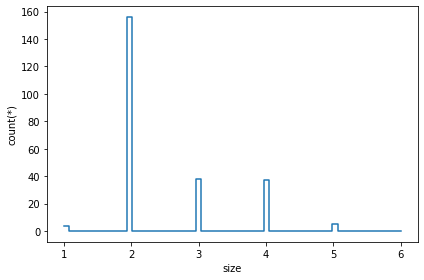

In [42]:
tip_data.plot1d(tip_data['size'])

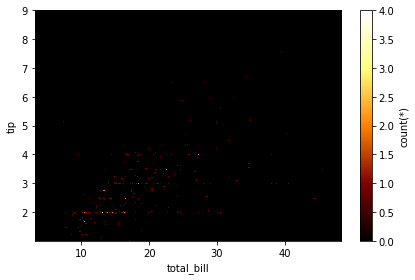

In [43]:
tip_data.plot(tip_data.total_bill, tip_data.tip, limits='99.7%');


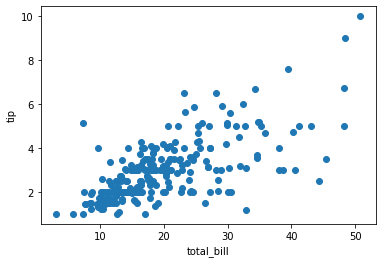

In [45]:
tip_data.scatter(tip_data['total_bill'], tip_data['tip'])

## Advance Plotting

In [0]:
#loading new york taxi dataset
nyctaxi = vaex.open('s3://vaex/taxi/yellow_taxi_2009_2015_f32.hdf5?anon=true')

In [47]:
nyctaxi.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.0026,40.7397,nan,nan,-73.87,40.7702,23.7,0,nan,4.74,0,28.44
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7


In [48]:
nyctaxi.shape

(1173057927, 18)

In [55]:
nyctaxi.info()

column,type,unit,description,expression
vendor_id,str,,,
pickup_datetime,datetime64[ns],,,
dropoff_datetime,datetime64[ns],,,
passenger_count,int64,,,
payment_type,str,,,
trip_distance,float32,,,
pickup_longitude,float32,,,
pickup_latitude,float32,,,
rate_code,float32,,,
store_and_fwd_flag,float32,,,


<string>:1: RuntimeWarning: invalid value encountered in less


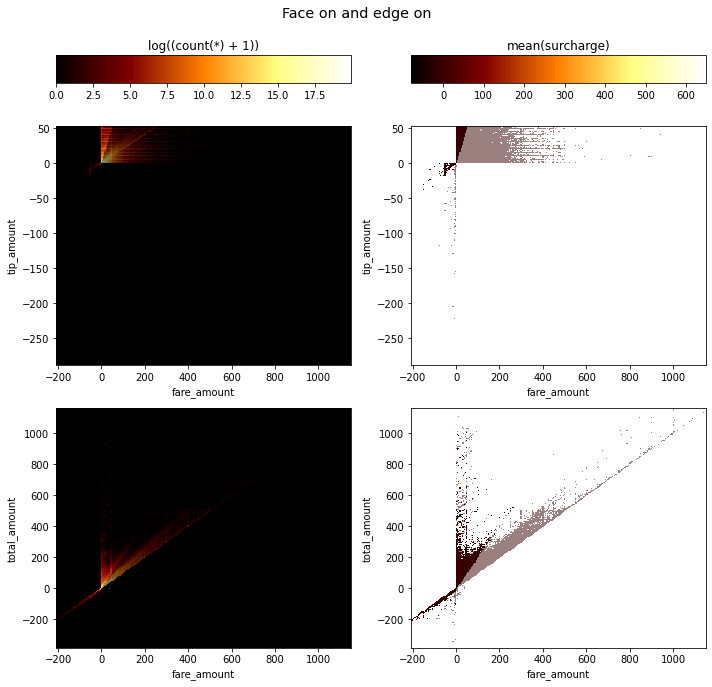

In [50]:
nyctaxi.plot([["fare_amount", "tip_amount"], ["fare_amount", "total_amount"]],
        limits='99.7%',
        what=[np.log(vaex.stat.count()+1), vaex.stat.mean(nyctaxi.surcharge)],
        selection=[None, nyctaxi.fare_amount < nyctaxi.tip_amount],
        title="Face on and edge on", figsize=(10,10));

<string>:1: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.6/dist-packages/vaex/viz/mpl.py:779: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = pylab.subplot(gs[row_offset + row * row_scale:row_offset + (row + 1) * row_scale, column * column_scale:(column + 1) * column_scale])


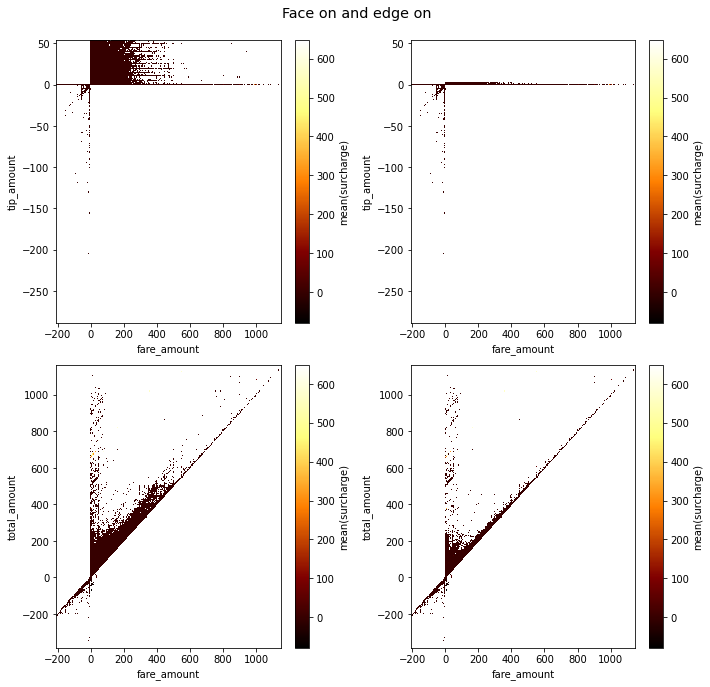

In [56]:
nyctaxi.plot([["fare_amount", "tip_amount"], ["fare_amount", "total_amount"]],
        limits='99.7%',
        what=vaex.stat.mean(nyctaxi.surcharge),
        selection=[None, nyctaxi.tip_amount < 3],
        visual=dict(column='selection'),
        title="Face on and edge on", figsize=(10,10));
